In [1]:
library('GoFKernel')

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


## Exercise 1

I found the *$E[x]$* and the *Var(x)* for both models using the definition:

\begin{equation}
E[X] = \sum_{i} x_i p(x_i)\\
Var(X) = E[X^2] − (E[X])^2
\end{equation}


In [2]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)
exp1 <- sum(x*p1)
exp2 <- sum(x*p2)
var1 <- sum(x*x*p1)-exp1^2
var2 <- sum(x*x*p2)-exp2^2
sprintf(paste(c("Expectation value for model 1 is", exp1, "with Variance", round(var1,4))))
sprintf(paste(c("Expectation value for model 1 is", exp2, "with Variance", round(var2,4))))

[1] "Expectation value for model 1 is" "15.959"                          
[3] "with Variance"                    "0.034"

[1] "Expectation value for model 1 is" "15.9622"                         
[3] "with Variance"                    "0.0282"

## Exercise 2

A) Using the function that generates random numbers starting from an exponential distribution ( $rexp()$ ) we can simulate the waiting times of 50 people and then insert the relative frequencies into a histogram

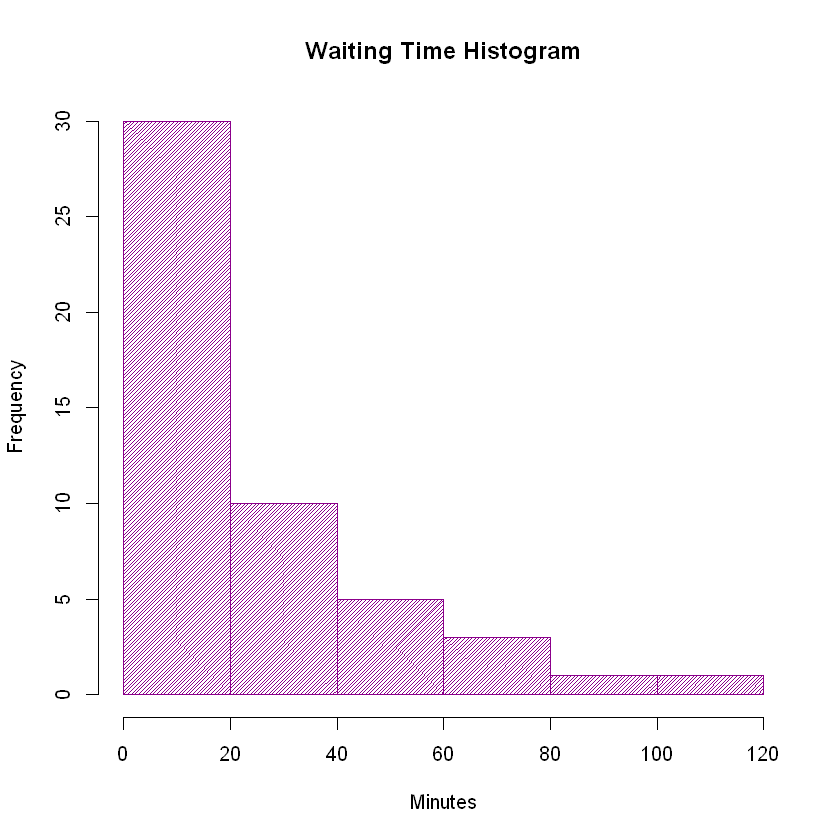

In [3]:
#A
lambda <- 1/30
datas <- rexp(1:50,lambda)
hist(datas,
main="Waiting Time Histogram",
xlab="Minutes",
col="darkmagenta", density=50,
freq=TRUE
)


B) To find the result I would have to integrate the values of the *pdf* from 0 to 10, but I can also compute the value of the cumulative distribution function (in the case of an exponential distribution: *pexp()* ) for x = 10

In [4]:
p <- pexp(10, 1/lambda)
sprintf("The probability that a person will wait for less than 10 minutes %.2f", p)

[1] "The probability that a person will wait for less than 10 minutes 1.00"

C) to compute the average of the data just use the mean() function; the expected value is theoretically lambda, while it can be computed using a set of values (from 1 to 200 in this case) and the relative probabilities, applying the definition

In [5]:
avg <- mean(datas)
sprintf("The average waiting time from the simulated data is %.2f, and the expected value is %.2f", avg, 1/lambda)
probs <- dexp(1:200, rate=lambda)
exp_computed <- sum((1:200)*probs)/sum(probs)
sprintf("The expected value computed manipulating the probability distribution is  %.2f", exp_computed)

[1] "The average waiting time from the simulated data is 23.86, and the expected value is 30.00"

[1] "The expected value computed manipulating the probability distribution is  30.25"

D)

In [6]:
p_1h <- 1 - pexp(60, lambda)
sprintf("The probability for waiting more than one hour before being received is %.2f", p_1h)

[1] "The probability for waiting more than one hour before being received is 0.14"

## Exercise 3

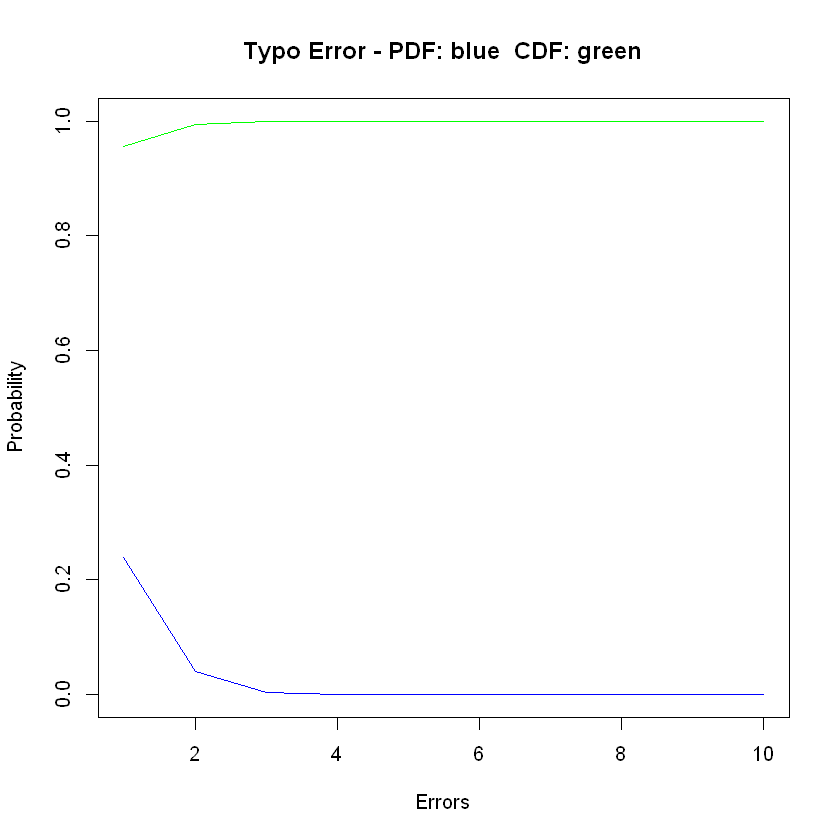

In [7]:
lambda2 <- 1/3
d <- dpois(1:10,lambda2)
c <- ppois(1:10,lambda2)
plot(1:10, c, type = "l", col='green', xlab = "Errors", ylab = "Probability" ,
     main = "Typo Error - PDF: blue  CDF: green", ylim = c(0, max(c)))
lines(1:10, d, type = "l", col='blue')

In [8]:
prob_least1 <- 1-ppois(0, lambda2) 
sprintf("The probability of having at least one error on a specific page is  %.2f", prob_least1)

[1] "The probability of having at least one error on a specific page is  0.28"

## Exercise 4

In [9]:
prob <- 1/13
k <- 1
n <- 10
vector_n <- 10:(52-4)

The distribution that describes the necessary number of attempts to succeed is the *geometric distribution*
\begin{equation}
 P(X=x) = (1 - p)^{x-1}\cdot p
\end{equation}
where $p$ is the success probability and $x$ is the number of attemps 

In [10]:
prob10 = 1 - pgeom(9, 1/13)
sprintf("The probability that at least 10 draws are needed is: %.3f", prob10)

[1] "The probability that at least 10 draws are needed is: 0.449"

## Exercise 5

A) Analytical solution:
\begin{equation}
\int_{1}^{2} c(t-1)(2-t) d t=c\left[-\frac{t^{3}}{3}+\frac{3}{2} t-2\right]_{1}^{2}=c \cdot \frac{1}{6}=1 \rightarrow c=6
\end{equation}

In [11]:
pdf <- function(t){(t-1)*(2-t)}
F <- integrate(pdf, lower=1, upper=2)
c <- 1/(F$value)
sprintf("c = %.2f", c)

[1] "c = 6.00"

B)

In [12]:
dpdf5 <- function (t) {
    f <- ifelse((t>1 & t<2), c*(t-1)*(2-t), 0)
    return (f)
}
dpdf5 <- Vectorize(dpdf5)

The definition of the *cumulative distribution function* is $F(x) = \int_{-\infty}^x f(t) dt$. Made exception for $F(t<1)=0$ and $F(t>2)=1$ we can use the solution of the integral found before, as analytical solution: 

$$
F(x) = 6 \cdot \left[-\frac{t^{3}}{3}+\frac{3}{2} t-2\right]_{1}^{x}
$$
or use the *integrate()* R function

In [13]:
ppdf5 <- function(x) {
    f <- ifelse((x>1 & x<2), 
                integrate(dpdf5,1,x)$value,
                ifelse(x <= 1, 0, 1)
          )
    return (f)
}
ppdf5 <- Vectorize(ppdf5)

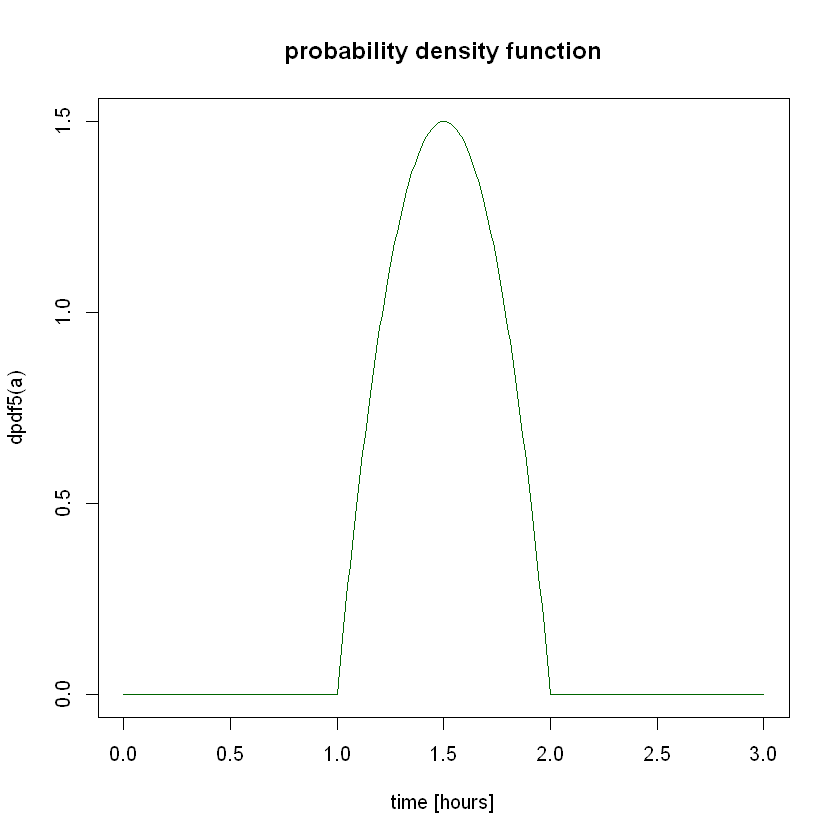

In [14]:
a <- seq(0,3,0.01)
plot(a, dpdf5(a), type='l', col='darkgreen', main="probability density function", xlab='time [hours]')

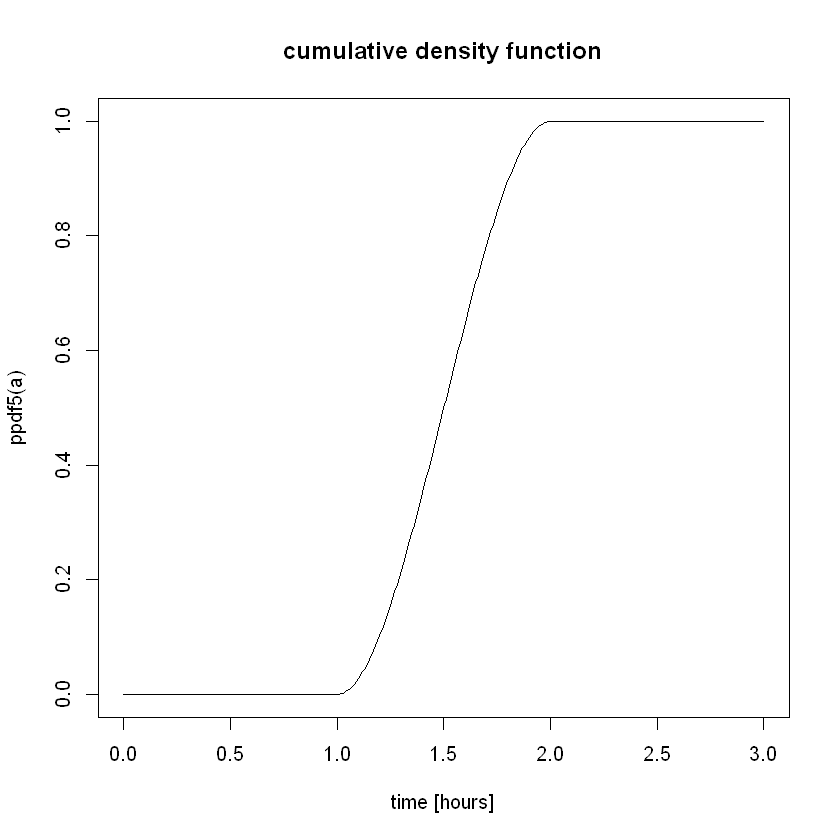

In [15]:
plot(a, ppdf5(a), type='l', main="cumulative density function", xlab='time [hours]')

The *quantile distribution* is for definition the inverse of cdf, then we can compute analytically the inverse function of cdf in the range $[1,2]$ and set $1$ for $t<1$ and $0$ for $t>2$, as analytical solution, or use the *inverse()* R function to compute it

In [16]:
qpdf5 <- inverse(ppdf5, 1, 2)

Lastly i defined a *rand_generator()* function that generates N random values following a given distribution. Then i tested it for a simulation with 200 students

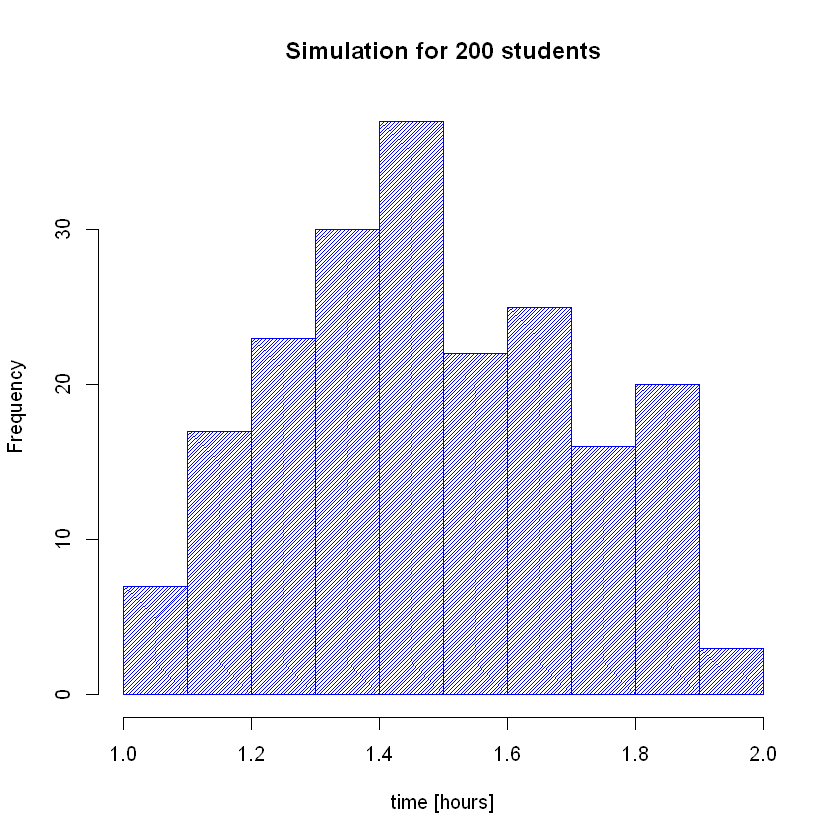

In [24]:
rpdf5 <- function(N, lower, upper){
    #random N points in the range (0,1)
    points <- runif(N)
    #lower and upper to specify the desired interval
    rfunc <- Vectorize(inverse(ppdf5, lower, upper))
    return (rfunc(points))
}
students <- 200
hist(rpdf5(students, 1, 2), main='Simulation for 200 students', xlab='time [hours]',
    col="blue", density=50, freq=TRUE)

C)

In [25]:
prob_more_75 <- 1 - ppdf5(1.35)
prob_90 <- dpdf5(1.5)
prob_120 <- dpdf5(2)
sprintf("The probability that the student will finish the aptitude test in more than 75 minutes is %.3f", prob_more_75)
sprintf("The probability that the student will finish the aptitude test in 90 minutes is %.3f", prob_90) #can't understand the issue
sprintf("The probability that the student will finish the aptitude test in 2 hours is %.3f", prob_120)

[1] "The probability that the student will finish the aptitude test in more than 75 minutes is 0.718"

[1] "The probability that the student will finish the aptitude test in 90 minutes is 1.500"

[1] "The probability that the student will finish the aptitude test in 2 hours is 0.000"

## Exercise 6
A)

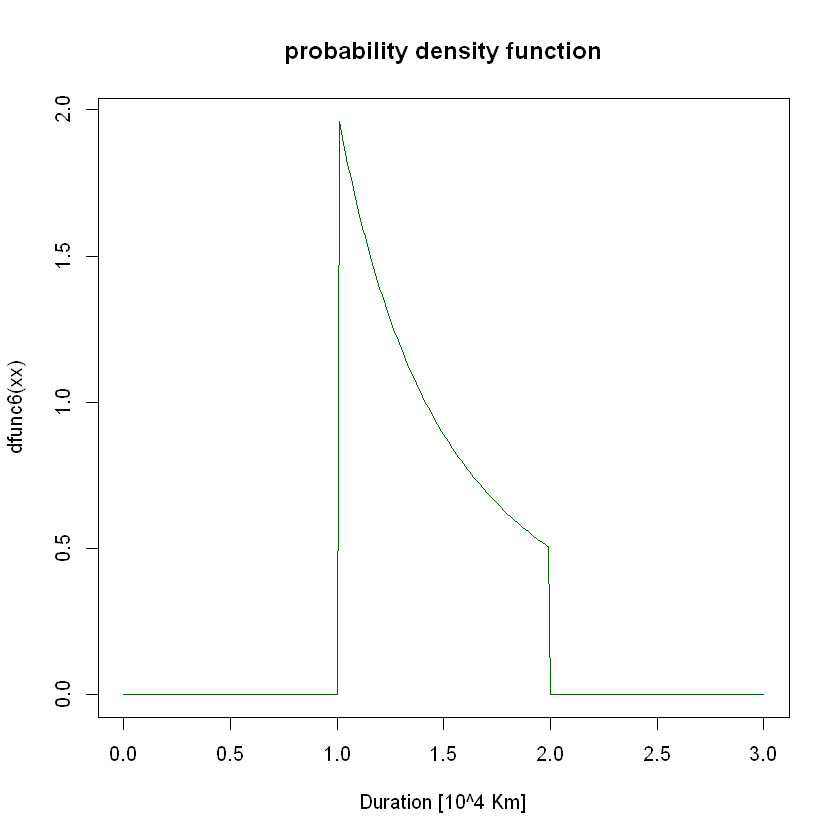

In [19]:
dfunc6 <- function(x){
    f <- ifelse((x>1 & x<2), 
                2/(x^2),
                0
          )
    return (f)
}
dfunc6 <- Vectorize(dfunc6)
xx=seq(0,3,0.01)
plot(xx, dfunc6(xx), type='l', col='darkgreen', main="probability density function", xlab='Duration [10^4 Km]')

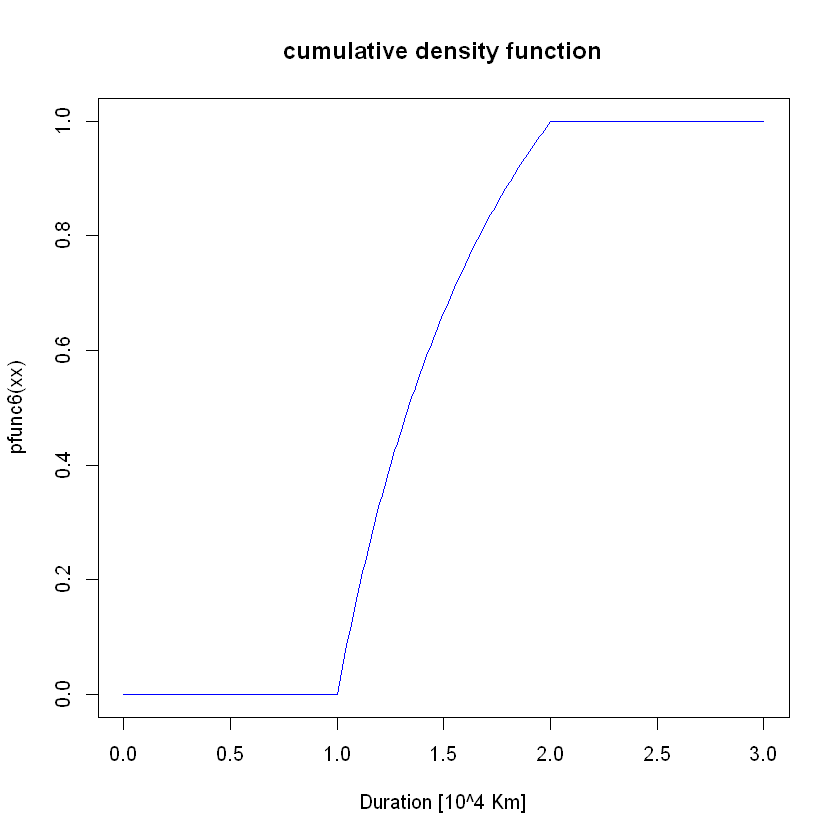

In [20]:
pfunc6 <- function(x) {
    f <- ifelse((x>1 & x<2), 
                integrate(dfunc6,1,x)$value,
                ifelse(x <= 1, 0, 1)
          )
    return (f)
}
pfunc6 <- Vectorize(pfunc6)
plot(xx, pfunc6(xx), type='l', col='blue', main="cumulative density function", xlab='Duration [10^4 Km]')

In [21]:
qfunc6 <- inverse(pfunc6, 1, 2)
rfunc6 <- function(N, lower, upper){
    #random N points in the range (0,1)
    points <- runif(N)
    #lower and upper to specify the desired interval
    rfunc <- Vectorize(inverse(pfunc6, lower, upper))
    return (rfunc(points))
}

B)

In [22]:
sprintf("The probability that the probability that tires will last less than 15000 km is %.3f", pfunc6(1.5))

[1] "The probability that the probability that tires will last less than 15000 km is 0.667"

C)

[1] "The expected value is 1.282"

[1] "The variance is 0.062"

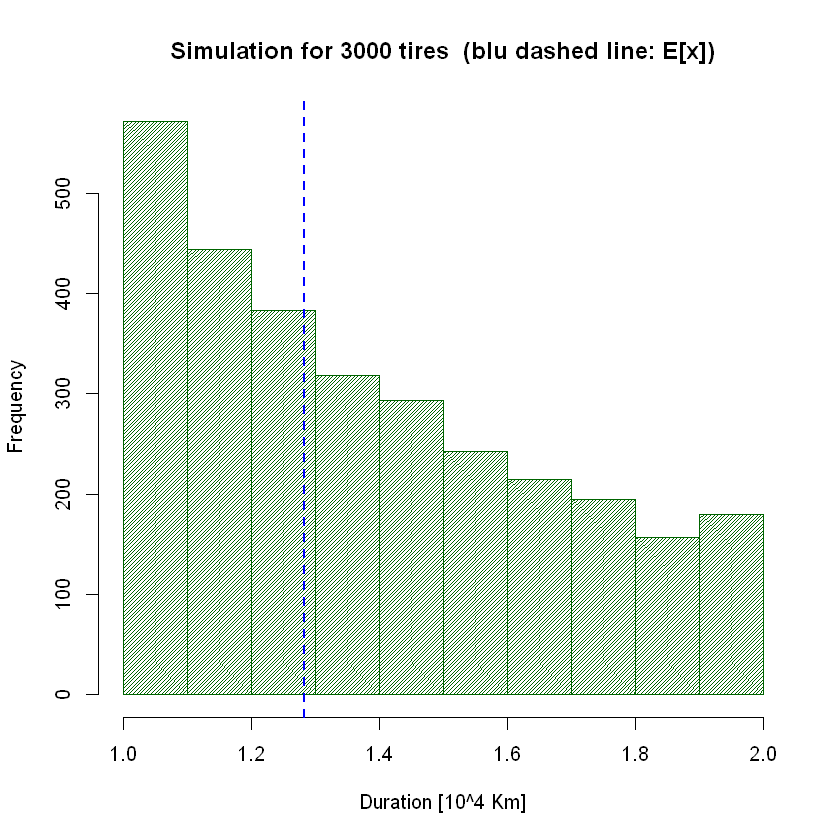

In [23]:
tires <- 3000
rnd_samples <- rfunc6(tires, 1, 2)
mean6 <- sum(rnd_samples*dfunc6(rnd_samples))/sum(dfunc6(rnd_samples))
var6 <- sum((rnd_samples^2)*dfunc6(rnd_samples))/sum(dfunc6(rnd_samples)) - mean6^2
sprintf("The expected value is %.3f", mean6)
sprintf("The variance is %.3f", var6)

hist(rnd_samples, main='Simulation for 3000 tires  (blu dashed line: E[x])', xlab='Duration [10^4 Km]',
     col="darkgreen", density=50, freq=TRUE)
abline(v=mean6,col="blue",lwd=2, lty=2)